In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv('winequalityN.csv')

In [3]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Exploratory data analysis

## Count Type

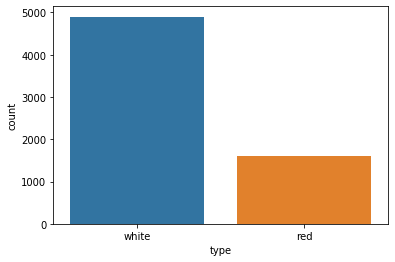

In [4]:
sns.countplot(x='type',data=data)

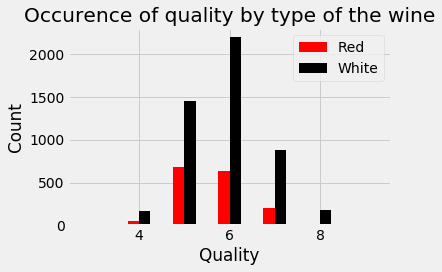

In [4]:
#Data_Manipulation
df1=data.loc[:,['quality','type']]
df1_3=df1[df1['quality']==3]
df1_3.groupby('type').count()
df=pd.DataFrame([])
for i in np.sort(df1['quality'].unique()):
    c=df1[df1['quality']==i]
    c=c.groupby('type').count()
    df=pd.concat([df,c],sort=True,axis=1)

df.columns=[3,4,5,6,7,8,9]
df=df.fillna(0)
df=df.transpose()
#Data_Visualization
plt.style.use('fivethirtyeight')
indexes=np.arange(3,10)
width=0.25
plt.bar(indexes-(width/2),df['red'],width=width,color='r',label='Red')
plt.bar(indexes+(width/2),df['white'],width=width,color='k',label='White')
plt.legend()
plt.title('Occurence of quality by type of the wine')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.tight_layout()



In [5]:
df1=data.drop('type',axis=1)
df11=df1.groupby('quality').mean()
df12=df1.groupby('quality').std()
df11


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060158,20.636574,103.432870,0.994833,3.231620,0.504884,10.180093
5,7.329348,0.389768,0.307721,5.804116,0.064666,30.237371,120.839102,0.995849,3.212042,0.526416,9.837783
6,7.178037,0.313731,0.323786,5.551182,0.054168,31.165021,115.410790,0.994558,3.217701,0.532466,10.587553
7,7.128962,0.288895,0.334764,4.733952,0.045272,30.422150,108.498610,0.993126,3.227790,0.547025,11.386006
8,6.838542,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [10]:
df12

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.747853,0.341913,0.173510,4.730721,0.062014,59.990327,112.141762,0.002833,0.213246,0.126994,1.106497
4,1.264825,0.229311,0.182079,3.812136,0.047153,18.865524,61.282714,0.002475,0.188390,0.164433,0.985923
5,1.259910,0.178591,0.160466,4.994311,0.042007,18.565479,60.782859,0.002439,0.157221,0.141680,0.814416
6,1.291691,0.147025,0.142341,4.888507,0.030844,16.835507,55.454390,0.003035,0.161038,0.146730,1.126491
7,1.372141,0.116784,0.111471,4.041440,0.021786,14.925261,47.943716,0.003020,0.159613,0.160436,1.199337
8,1.149311,0.119357,0.102446,4.175467,0.015694,17.195268,42.135241,0.002880,0.157424,0.165891,1.278921
9,0.983362,0.057619,0.082037,3.759255,0.007436,13.427584,19.824228,0.003118,0.082885,0.092628,1.013410


In [6]:
A=pd.DataFrame(data.isnull().any(),columns=['values'])
for i in A[A['values']==True].index:
    data[i].fillna(np.mean(data[i]),inplace=True)

# Feature_Engineering

## ANOVA TEST

In [7]:
## AS our independent variable ( the one that we want to predict) s categorical we will use the ANOVA test 
## to express its correlation with the other variables.  

from scipy import stats
data['Num_Type']=pd.get_dummies(data['type']).iloc[:,1]
list_values=data.columns
list_values=list_values.drop('type','quality')
for i in list_values:
    F,p=stats.f_oneway(data[data['quality']==3].loc[:,i],
                      data[data['quality']==4].loc[:,i],
                      data[data['quality']==5].loc[:,i],
                      data[data['quality']==6].loc[:,i],
                      data[data['quality']==7].loc[:,i],
                      data[data['quality']==8].loc[:,i],
                      data[data['quality']==9].loc[:,i])
    print("F-value of "+i,format(F))

F-value of fixed acidity 8.027177925674534
F-value of volatile acidity 96.90611237061283
F-value of citric acid 9.365487747109961
F-value of residual sugar 9.085818071482997
F-value of chlorides 50.86266522352452
F-value of free sulfur dioxide 14.939170402675266
F-value of total sulfur dioxide 7.716088194433098
F-value of density 136.95123576696437
F-value of pH 2.010384727642274
F-value of sulphates 4.375673292867339
F-value of alcohol 320.59344780291025
F-value of quality inf
F-value of Num_Type 19.757360058159275


C:\Users\HAMCHTKOU\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3235: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
data_=data.drop('type',axis=1)
X=np.array(data_.loc[:,['volatile acidity','density','alcohol','chlorides']])
y=np.array(data['quality'])
#pca=PCA(n_components=4)
#pca.fit(X)
#X_reduct=pca.transform(X)
#scaler=MinMaxScaler()
#scaler.fit(X)
#X_scaled=scaler.transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Prediction using   Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_1=RandomForestClassifier(n_estimators=1)
model_1.fit(X_train,y_train)
y_predict_1=model_1.predict(X_test)
print(accuracy_score(y_test,y_predict_1))

0.5452307692307692


# Prediction using SVC

In [38]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
params={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.01,0.1,1,10]}
Clf=GridSearchCV(SVC(),params,cv=5, scoring='accuracy' )
Clf.fit(X_train,y_train)
print(Clf.best_params_)
print(Clf.best_score_)

{'C': 1, 'gamma': 10}
0.5334564860426929


In [31]:
model=SVC(C=100,gamma=10)
model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)
print(accuracy_score(y_train,y_predict_train))
print(accuracy_score(y_test,y_predict_test))

0.5738916256157636
0.555076923076923


## Prediction using Gradient Boosting classifier 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
params={'n_estimators':range(20,81,10)}
model=GradientBoostingClassifier(learning_rate=0.1,min_samples_split=50,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8)
Clf=GridSearchCV(model,params,cv=5, scoring='accuracy' )
Clf.fit(X_train,y_train)
print(Clf.best_params_)
print(Clf.best_score_)

{'n_estimators': 80}
0.56876026272578


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
params={'max_depth':range(3,9,1),'min_samples_split':range(40,71,10),'min_samples_leaf':range(40,71,10)}
model=GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt',subsample=0.8,n_estimators=80)
Clf=GridSearchCV(model,params,cv=5, scoring='accuracy' )
Clf.fit(X_train,y_train)
print(Clf.best_params_)
print(Clf.best_score_)

{'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 70}
0.5708128078817734


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(learning_rate=0.1,n_estimators=80,min_samples_split=70,min_samples_leaf=40,max_depth=8,max_features='sqrt',subsample=0.8)
model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)
print(accuracy_score(y_train,y_predict_train))
print(accuracy_score(y_test,y_predict_test))

0.7524630541871922
0.5932307692307692


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)
print(accuracy_score(y_train,y_predict_train))
print(accuracy_score(y_test,y_predict_test))

0.6369047619047619
0.5753846153846154
